In [1]:
import sys
main_dir = '../'
main_dir2 = '../../OQSPlots'
sys.path.append(main_dir)
sys.path.append(main_dir2)

import numpy as np
import scipy.ndimage as sn
from scipy.optimize import minimize, minimize_scalar
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from functools import lru_cache
import tqdm

import cmasher as cmr
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


import opennu as on

from qutip import piqs
import run

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

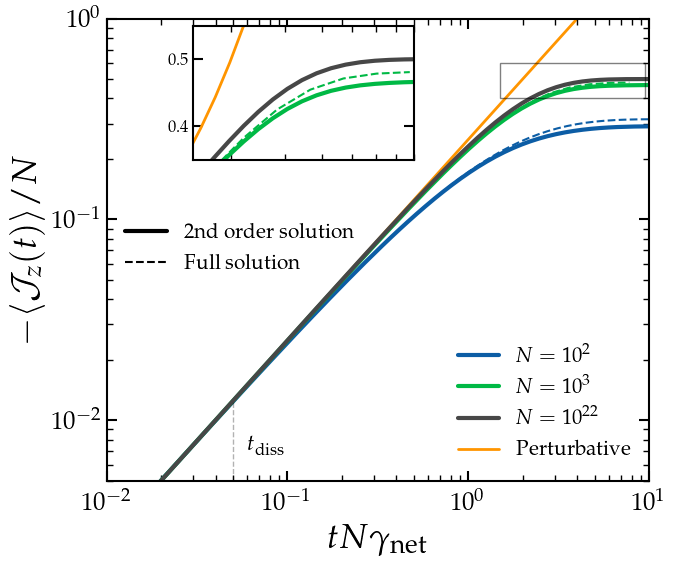

In [2]:
fig, ax = plt.subplots(figsize=(7,6))

gpr = 0.95

tnorm = 1/(1-gpr)

n = 100
path  = main_dir+f'../OpenNu/output/N%d'%n
#path  = f'/Users/g/projects/OpenNu/output/N%d'%n
data = np.loadtxt(path+f'/Product_Euler_h0.1_g0.95.txt')
t = data[:,0]
jz = -(data[:,3]-data[0,3])/n
plt.loglog(t/tnorm, jz, ls='--', c='C0', lw=1.5)


n = 1000
path  = main_dir+f'../OpenNu/output/N%d'%n
#path  = f'/Users/g/projects/OpenNu/output/N%d'%n
data = np.loadtxt(path+f'/Product_Euler_h0.5_g0.95.txt')
t = data[:,0]
jz = -(data[:,3]-data[0,3])/n
plt.loglog(t/tnorm, jz, ls='--', c='C1', lw=1.5)



N = 1e2
t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=0, ti=1e-20, ntimes=500)
plt.loglog(t/tnorm, -(jz-jz[0])/N, c='C0', label=r'$N=10^2$')
N = 1e3
t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=0, ti=1e-20, ntimes=500)
plt.loglog(t/tnorm, -(jz-jz[0])/N, c='C1', label=r'$N=10^3$')

N = 1e22
t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=0, ti=1e-20, ntimes=500)
plt.loglog(t/tnorm, -(jz-jz[0])/N, c='C5', label=r'$N=10^{22}$')
#t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=N, ti=1e-20, ntimes=500)
#plt.loglog(t/tnorm, -(jz-jz[0])/N, c='C5', ls='dotted', lw=1.5)

tt = np.geomspace(1e-4, 1e4, 1000)
plt.loglog(tt,tt/4, c='C2', lw=2, label='Perturbative', zorder=0)



style_legend = [
    Line2D([0], [0], color='black', linestyle='-', label='2nd order solution'),
    Line2D([0], [0], color='black', linestyle='--',lw=1.5,  label='Full solution')
]
legend1 = ax.legend(handles=style_legend, loc='center left')
ax.add_artist(legend1)

# Define the rectangle in data coordinates
zoom_rect = patches.Rectangle(
    (1.5, 0.4), 
    8,             
    0.2,       
    linewidth=1,
    edgecolor='k',
    facecolor='none',
    linestyle='-',
    alpha=0.5,
    transform=ax.transData,
    zorder=3
)

ax.add_patch(zoom_rect)

#ax.text(0.18,1.5e-2, r'$N=10^{22}$, with dephasing', fontsize=15)
#ax.text(0.4,8.5e-3, r'$\gamma^{\rm loc}_{\phi}=N\gamma_-$', fontsize=15)

ax.axvline(1-gpr, ymin=0, ymax=0.17, c='k', ls='--', lw=1, alpha=0.3)
ax.text(0.06, 7e-3, r'$t_{\rm diss}$',c='k', fontsize=16)

ax.set_xlim(1e-2, 10)
ax.set_ylim(5e-3,1)
ax.set_xlabel(r'$~tN\gamma_{\rm net}$', fontsize=25)
ax.set_ylabel(r'$-{\langle {\cal J}_z(t)\rangle}/N$', fontsize=25)
ax.legend(loc=4)



# Add inset
axins = inset_axes(ax, width="70%", height="50%", loc='center right',
                   bbox_to_anchor=(0.005, 0.55, 0.58, 0.58), bbox_transform=ax.transAxes)


# Replot the same curves in the inset
n = 100
path  = main_dir+f'../OpenNu/output/N%d'%n
#path  = f'/Users/g/projects/OpenNu/output/N%d'%n
data = np.loadtxt(path+f'/Product_Euler_h0.1_g0.95.txt')
t = data[:,0]
jz = -(data[:,3]-data[0,3])/n
axins.loglog(t/tnorm, jz, ls='--', c='C0', lw=1.5)

n = 1000
path  = main_dir+f'../OpenNu/output/N%d'%n
#path  = f'/Users/g/projects/OpenNu/output/N%d'%n
data = np.loadtxt(path+f'/Product_Euler_h0.5_g0.95.txt')
t = data[:,0]
jz = -(data[:,3]-data[0,3])/n
axins.loglog(t/tnorm, jz, ls='--', c='C1', lw=1.5)


N = 1e2
t, jz, _ = on.solve(N, gp_ratio=0.95, gd_ratio=0, ti=1e-20, ntimes=500)
axins.loglog(t/tnorm, -(jz-jz[0])/N, c='C0')
N = 1e3
t, jz, _ = on.solve(N, gp_ratio=0.95, gd_ratio=0, ti=1e-20, ntimes=500)
axins.loglog(t/tnorm, -(jz-jz[0])/N, c='C1')
N = 1e22
t, jz, _ = on.solve(N, gp_ratio=0.95, gd_ratio=0, ti=1e-20, ntimes=500)
axins.loglog(t/tnorm, -(jz-jz[0])/N, c='C5')

axins.loglog(t, t/4, c='C2', lw=2)

axins.set_xlim(1.5, 8)
axins.set_ylim(0.35, 0.55)
#axins.set_xscale('linear')
axins.set_yscale('linear')

#axins.tick_params(axis='both', which='both', length=0, labelleft=False, labelbottom=False)
axins.tick_params(axis='both', which='both', labelsize=12, labelbottom=False)
plt.show()
#fig.savefig(main_dir+'plots/jz_1.pdf', bbox_inches='tight')

In [69]:
def solve(Na, gp_ratio=0.95, gd_ratio=0, gml_ratio=0, gpl_ratio=0, ti=1e-4, tf=1e4, ntimes=200, p_init=1, tlin=False, nu_off=False):
    '''
    '''
    gm  = 1
    td  = 1/(Na*gm)
    gm  = 1*td         # gamma-
    gp  = gp_ratio*td  # gamma+
    gd  = gd_ratio*td  # gamma_phi local
    gml = gml_ratio*td # gamma- local
    gpl = gpl_ratio*td # gamma+ local

    t_span = (ti, tf)
    t_eval = np.geomspace(*t_span, ntimes)
    if tlin:
        t_eval = np.linspace(*t_span, ntimes)

    jz0 = 0
    jj0 = 0.5 * Na + 0.25 * Na**2 * p_init**2
    jjz0 = (Na / 4)

    if nu_off:
        gm = 0
        gp = 0

    def system(t, y):
        jz, jj, jjz = y

        djz_dt = -gm * (jj - jjz + jz) + gp * (jj - jjz - jz) - gml * (jz + 0.5 * Na) + gpl * (-jz + 0.5 * Na) 
        djj_dt = -gd * (jj - jjz - 0.5 * Na) - gml * (jj + (Na - 1) * jz + jjz - Na) - gpl * (jj - (Na - 1) * jz + jjz - Na)
        djjz_dt = gm * (jj + jz - 3 * jjz + 2 * jz * jjz - 2 * jz * jj) + \
                  gp * (jj - jz - 3 * jjz - 2 * jz * jjz + 2 * jz * jj) - \
                  gml * ( (Na - 1) * jz + 2 * jjz - 0.5 * Na) - gpl * ( -(Na - 1) * jz + 2 * jjz - 0.5 * Na)
        return [djz_dt, djj_dt, djjz_dt]


    # Solve the first system
    y0 = [jz0, jj0, jjz0]
    sol = solve_ivp(system, (t_eval[0], t_eval[-1]), y0, t_eval=t_eval, method='BDF',
                             rtol=1e-10, atol=1e-12, dense_output=True)

    t = sol.t
    jz = sol.y[0]
    jj = sol.y[1]
    jz2 = sol.y[2]
    sz = np.sqrt(jz2-jz**2)
    return t, jz, sz

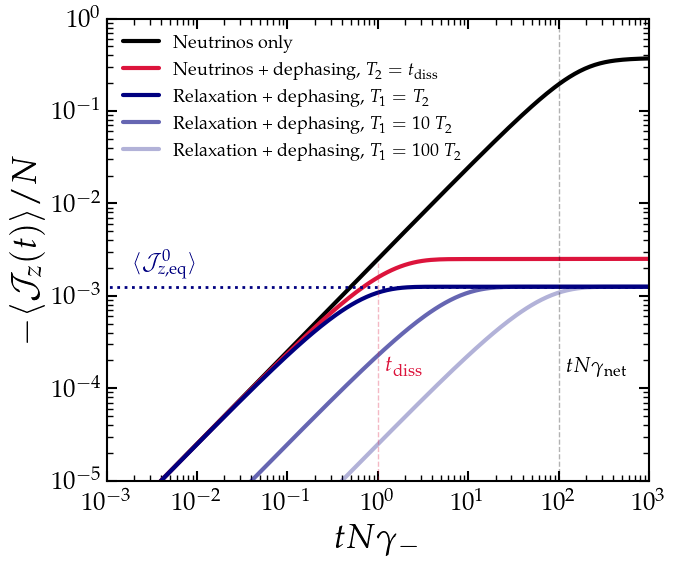

In [3]:
fig, ax = plt.subplots(figsize=(7,6))

gpr = 0.99
T12 = 10
gpr_loc = 0.995

tnorm = 1#1/(1-gpr)

cc = 'navy'

N = 1e3
t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=0, ti=1e-10, ntimes=500)
plt.loglog(t/tnorm, -(jz-jz[0])/N, c='k', label=r'Neutrinos only')

t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=N, ti=1e-20, ntimes=500)
plt.loglog(t/tnorm, -(jz-jz[0])/N,  label=r'Neutrinos + dephasing, $T_2=t_{\rm diss}$', c='crimson')


t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=N, gml_ratio=N, gpl_ratio=gpr_loc*N, ti=1e-10, ntimes=500, nu_off=True)
plt.loglog(t/tnorm, -(jz-jz[0])/N, c=cc, label=r'Relaxation + dephasing, $T_1=T_2$')

t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=N, gml_ratio=1/T12*N, gpl_ratio=1/T12*gpr_loc*N, ti=1e-10, ntimes=500, nu_off=True)
plt.loglog(t/tnorm, -(jz-jz[0])/N, c=cc, alpha=0.6, label=r'Relaxation + dephasing, $T_1=10~T_2$')

t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=N, gml_ratio=1/T12/10*N, gpl_ratio=1/T12/10*gpr_loc*N, ti=1e-10, ntimes=500, nu_off=True)
plt.loglog(t/tnorm, -(jz-jz[0])/N, c=cc, alpha=0.3, label=r'Relaxation + dephasing, $T_1=100~T_2$')

plt.loglog(t, t/t*(1-gpr_loc)/(1+gpr_loc)/2, c=cc, lw=2, ls='dotted')
ax.text(2e-3, 2e-3, r'$\langle {\cal J}^0_{z, {\rm eq}}\rangle$',c=cc, fontsize=16)

ax.axvline(1, ymin=0, ymax=0.47, c='crimson', ls='--', lw=1, alpha=0.3)
ax.text(1.2, 1.5e-4, r'$t_{\rm diss}$',c='crimson', fontsize=16)

ax.axvline(1/(1-gpr), ymin=0, ymax=1, c='k', ls='--', lw=1, alpha=0.3)
ax.text(120, 1.5e-4, r'$tN\gamma_{\rm net}$', c='k', fontsize=15)



ax.set_xlim(1e-3, 1e3)
ax.set_ylim(1e-5,1)
ax.set_xlabel(r'$~tN\gamma_{-}$', fontsize=25)
ax.set_ylabel(r'$-{\langle {\cal J}_z(t)\rangle}/N$', fontsize=25)
plt.legend(fontsize=13)
plt.show()
#fig.savefig(main_dir+'plots/jz_2.pdf', bbox_inches='tight')

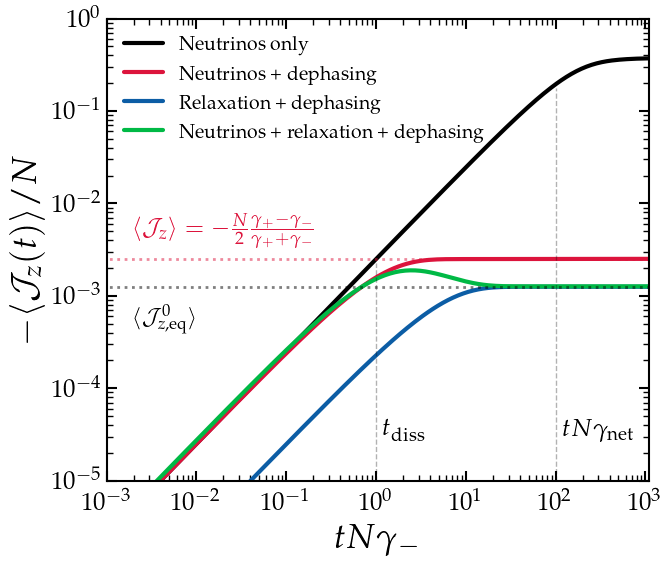

In [4]:
fig, ax = plt.subplots(figsize=(7,6))

gpr = 0.99
T12 = 10
gpr_loc = 0.995

tnorm = 1#1/(1-gpr)

cc = 'navy'

N = 1e3
t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=0, ti=1e-10, ntimes=500)
plt.loglog(t/tnorm, -(jz-jz[0])/N, c='k', label=r'Neutrinos only')

t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=N, ti=1e-20, ntimes=500)
plt.loglog(t/tnorm, -(jz-jz[0])/N,  label=r'Neutrinos + dephasing', c='crimson')


t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=N, gml_ratio=0.1*N, gpl_ratio=0.1*gpr_loc*N, ti=1e-10, ntimes=500, nu_off=True)
plt.loglog(t/tnorm, -(jz-jz[0])/N, label=r'Relaxation + dephasing')

t, jz, _ = on.solve(N, gp_ratio=gpr, gd_ratio=N, gml_ratio=0.1*N, gpl_ratio=0.1*gpr_loc*N, ti=1e-10, ntimes=500)
plt.loglog(t/tnorm, -(jz-jz[0])/N, label=r'Neutrinos + relaxation + dephasing')

ax.axvline(1, ymin=0, ymax=0.47, c='k', ls='--', lw=1, alpha=0.3)
ax.text(1.2, 3e-5, r'$t_{\rm diss}$',c='k', fontsize=18)

ax.axvline(1/(1-gpr), ymin=0, ymax=0.85, c='k', ls='--', lw=1, alpha=0.3)
ax.text(120, 3e-5, r'$tN\gamma_{\rm net}$', c='k', fontsize=18)

plt.loglog(t, t/t*(1-gpr_loc)/(1+gpr_loc)/2, c='k', lw=2, ls='dotted', alpha=0.5)
plt.loglog(t, t/t*(1-gpr)/(1+gpr)/2, c='crimson', lw=2, ls='dotted', alpha=0.5)
ax.text(2e-3, 0.5e-3, r'$\langle {\cal J}^0_{z, {\rm eq}}\rangle$',c='k', fontsize=16)
ax.text(2e-3, 4.5e-3, r'$\langle {\cal J}_z\rangle=-\frac{N}{2}\frac{\gamma_+-\gamma_-}{\gamma_++\gamma_-}$',c='crimson', fontsize=17)

ax.set_xlim(1e-3, 1.1e3)
ax.set_ylim(1e-5,1)
ax.set_xlabel(r'$~tN\gamma_{-}$', fontsize=25)
ax.set_ylabel(r'$-{\langle {\cal J}_z(t)\rangle}/N$', fontsize=25)
#ax.set_title(r'$\gamma_+/\gamma_-=0.99, ~\gamma_+^{\rm loc}/\gamma_-^{\rm loc}=0.995, ~T_1=10~T_2$', fontsize=16)
plt.legend(fontsize=14)
plt.show()
#fig.savefig(main_dir+'plots/jz_4.pdf', bbox_inches='tight')

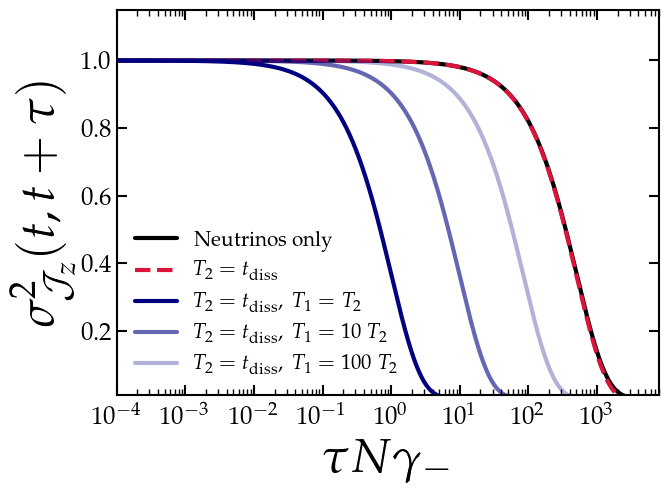

In [5]:
N = 1e3

cc1 = 'forestgreen'
cc2 = 'crimson'
cc3 = 'navy'

fig, ax = plt.subplots(figsize=(7,5))

t, jz1, c1, s1 = on.solveC(N, gp_ratio=0.99, gd_ratio=0, gl_ratio=0, ti=1e-5, tf=1e4, tcheck=0, ntimes=1000)
plt.semilogx(t, s1, label=r'Neutrinos only', c='k')

t, jz1, c1, s1 = on.solveC(N, gp_ratio=0.99, gd_ratio=N, gl_ratio=0, ti=1e-5, tf=1e4, tcheck=0, ntimes=1000)
plt.semilogx(t, s1, label=r'$T_2=t_{\rm diss}$', ls='--', c=cc2)

t, jz1, c1, s1 = on.solveC(N, gp_ratio=0.99, gd_ratio=N, gl_ratio=N, ti=1e-5, tf=1e4, tcheck=0, ntimes=1000)
plt.semilogx(t, s1, label=r'$T_2=t_{\rm diss}, ~T_1=T_2$', c=cc3)
t, jz1, c1, s1 = on.solveC(N, gp_ratio=0.99, gd_ratio=N, gl_ratio=0.1*N, ti=1e-5, tf=1e4, tcheck=0, ntimes=1000)
plt.semilogx(t, s1, label=r'$T_2=t_{\rm diss}, ~T_1=10~T_2$', c=cc3, alpha=0.6)
t, jz1, c1, s1 = on.solveC(N, gp_ratio=0.99, gd_ratio=N, gl_ratio=0.01*N, ti=1e-5, tf=1e4, tcheck=0, ntimes=1000)
plt.semilogx(t, s1, label=r'$T_2=t_{\rm diss}, ~T_1=100~T_2$', c=cc3, alpha=0.3)


ax.set_xlabel(r'$\tau N\gamma_-$')
ax.set_ylabel(r'$\sigma^2_{{\cal J}_z}(t, t+\tau)$')
plt.legend()
plt.xlim(1e-4, 8e3)
plt.ylim(0.01, 1.15)
plt.show()
#fig.savefig(main_dir+'plots/correlations_sigma.pdf', bbox_inches='tight')

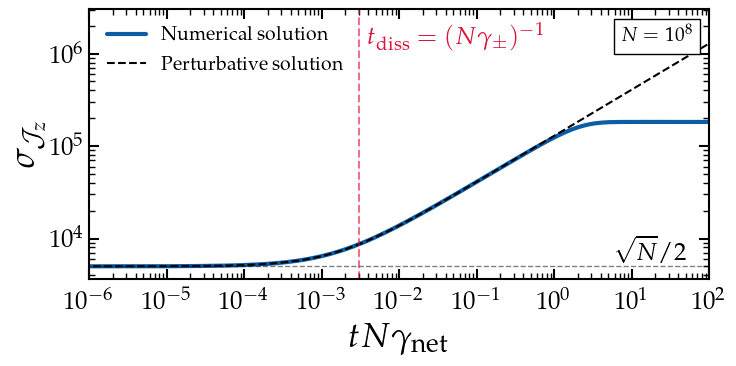

In [44]:
fig, ax = plt.subplots(figsize=(8,3.5))

Ncode = 1e8

gpr = 0.997
t, jz, s0 = on.solve(Ncode, gp_ratio=gpr, gd_ratio=0, ti=1e-4, tf=1e5, ntimes=200, p_init=1)

plt.loglog(t*(1-gpr), s0, label='Numerical solution')#/Ncode**(1/2)*2)
plt.loglog(t*(1-gpr), np.sqrt((Ncode/4*t/t)), c='k', ls='--', alpha=0.5, lw=1, )
plt.loglog(t*(1-gpr), np.sqrt((Ncode/4*t/t)+1/2*(Ncode+Ncode**(1/2))*t), c='k', ls='--', lw=1.5, label='Perturbative solution')

plt.axvline(1-gpr, c='crimson', ls='--', lw=1.5, alpha=0.6)
plt.text(4e-3, 1.3e6, r'$t_{\rm diss}=(N\gamma_{\pm})^{-1}$',c='crimson', fontsize=18)
plt.text(6, 6e3, '$\sqrt{N}/2$', fontsize=18)

text_box = AnchoredText(
    fr"$N=10^8$", 
    loc='upper right',            
    frameon=True,                
    prop=dict(size=14)
)
ax.add_artist(text_box)

plt.xlim(1e-6, 1e2)
# plt.ylim(0.5, 500)
plt.legend(fontsize=14)
plt.xlabel(r'$tN\gamma_{\rm net}$', fontsize=25)
plt.ylabel(r'$\sigma_{{\cal J}_z}$', fontsize=25)
plt.show()
fig.savefig(main_dir+'plots/sigma_z.pdf', bbox_inches='tight')

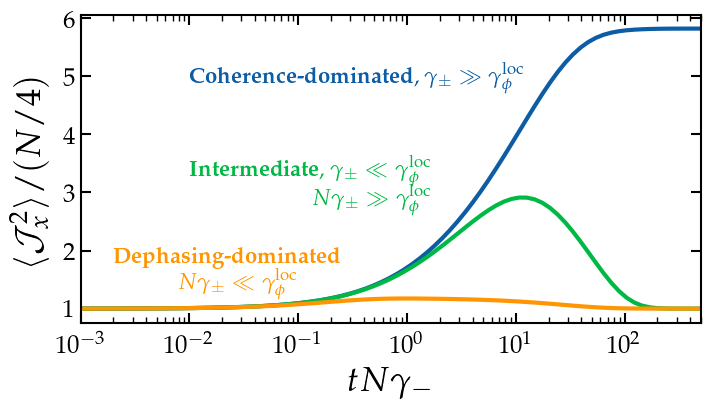

In [45]:
Ncode = 1e2

gpr = 0.997
ti = 1e-3
tf = 1e4
nt = 100

fig, ax = plt.subplots(1,1,figsize=(8,4))

t0, j0, _, _ = on.solvex(Ncode, gp_ratio=gpr, gd_ratio=0,    ti=ti, tf=tf, ntimes=nt)
t1, j1, _, _ = on.solvex(Ncode, gp_ratio=gpr, gd_ratio=15,   ti=ti, tf=tf, ntimes=nt)
t3, j3, _, _ = on.solvex(Ncode, gp_ratio=gpr, gd_ratio=5*Ncode, ti=ti, tf=tf, ntimes=nt)
ax.loglog(t0, np.sqrt(j0/Ncode*4))
ax.loglog(t1, np.sqrt(j1/Ncode*4))
ax.loglog(t3, np.sqrt(j3/Ncode*4))

ax.text(1e-2, 4.9, r'{\bf Coherence-dominated}, $\gamma_{\pm}\gg\gamma^{\rm loc}_\phi$', c='C0', fontsize=16)
ax.text(1e-2, 3.3, r'{\bf Intermediate}, $\gamma_{\pm}\ll\gamma^{\rm loc}_\phi$', c='C1', fontsize=16)
ax.text(1.38e-1, 2.8, r'$N\gamma_{\pm}\gg\gamma^{\rm loc}_\phi$', c='C1', fontsize=16)

ax.text(2e-3, 1.8, r'{\bf Dephasing-dominated}', c='C2', fontsize=16)
ax.text(8e-3, 1.35, r'$N\gamma_{\pm}\ll\gamma^{\rm loc}_\phi$', c='C2', fontsize=16)

ax.set_xlim(1e-3,5e2)
# plt.ylim(0.8, 10)

ax.set_xlabel(r'$tN\gamma_-$', fontsize=25)
ax.set_ylabel(r'$\langle {\cal J}_x^2\rangle/(N/4)$', fontsize=25, labelpad=10)
#ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax.set_yscale('linear')
plt.show()
fig.savefig(main_dir+'plots/regimes.pdf', bbox_inches='tight')

## Polarisation and dephasing effects

## $\sigma_{{\cal J}_z}$

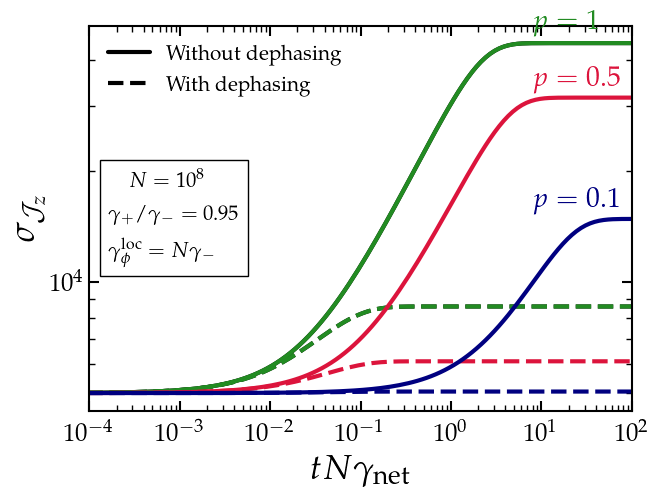

In [2]:
Ncode = 1e8

ti = 1e-5
tf = 1e5
gpr = 0.95

fig, ax = plt.subplots(figsize=(7,5))

c1 = 'forestgreen'
c2 = 'crimson'
c3 = 'navy'

norm = 1

t, j0, s0, = on.solve(Ncode, p_init=0.1, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=0)
t, j1, s1, = on.solve(Ncode, p_init=0.5, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=0)
t, j2, s2, = on.solve(Ncode, p_init=1, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=0)
t, j3, s3, = on.solve(Ncode, p_init=0.1, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=Ncode)
t, j4, s4, = on.solve(Ncode, p_init=0.5, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=Ncode)
t, j5, s5, = on.solve(Ncode, p_init=1, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=Ncode)

plt.loglog(t*(1-gpr), np.abs(s2)/norm, label=r'Without dephasing', c='k')
plt.loglog(t*(1-gpr), np.abs(s5)/norm, label=r'With dephasing', c='k', ls='--')

plt.loglog(t*(1-gpr), np.abs(s2)/norm, c=c1)
plt.loglog(t*(1-gpr), np.abs(s5)/norm, c=c1, ls='--')

plt.loglog(t*(1-gpr), np.abs(s1)/norm, c=c2)
plt.loglog(t*(1-gpr), np.abs(s4)/norm, c=c2, ls='--')
plt.loglog(t*(1-gpr), np.abs(s0)/norm, c=c3)
plt.loglog(t*(1-gpr), np.abs(s3)/norm, c=c3, ls='--')

plt.xlim(1e-4, 1e2)
# plt.ylim(4e3, 6e4)
plt.xlabel(r'$tN\gamma_{\rm net}$', fontsize=25)
plt.ylabel(r'$\sigma_{{\cal J}_z}$', fontsize=25)

plt.text(8, 4.85e4, r'$p=1$', c=c1)
plt.text(8, 3.4e4,  r'$p=0.5$', c=c2)
plt.text(8, 1.6e4, r'$p=0.1$', c=c3)

text_box = AnchoredText(
    #fr"$N=10^8$\\~\\~~$\gamma_+/\gamma_-=0.95$", 
    r"$N=10^8$\\~\\~~$\gamma_+/\gamma_-=0.95$~\\~\\~~$\gamma^{\rm loc}_\phi=N\gamma_-$",
    loc='center left',            
    frameon=True,                
    prop=dict(size=15)
)
ax.add_artist(text_box)
plt.legend(loc=2)
plt.show()
#fig.savefig(main_dir+'plots/sigmaz_p.pdf', bbox_inches='tight')

## $\sigma^2_{{\cal J}_z}$

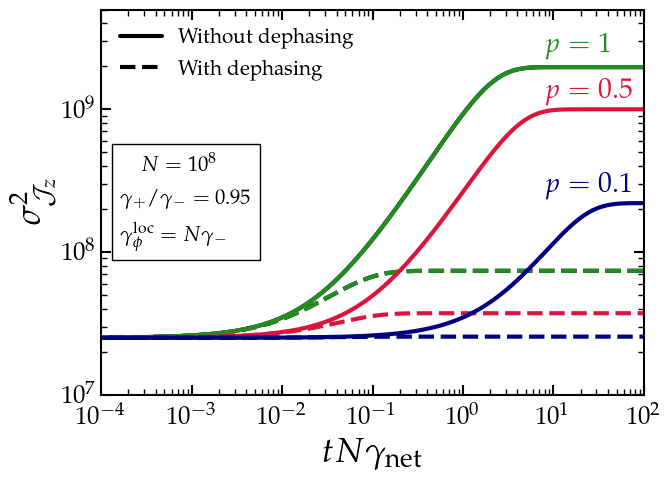

In [17]:
Ncode = 1e8

ti = 1e-5
tf = 1e5
gpr = 0.95

fig, ax = plt.subplots(figsize=(7,5))

c1 = 'forestgreen'
c2 = 'crimson'
c3 = 'navy'

norm = 1

t, j0, s0, = on.solve(Ncode, p_init=0.1, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=0)
t, j1, s1, = on.solve(Ncode, p_init=0.5, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=0)
t, j2, s2, = on.solve(Ncode, p_init=1, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=0)
t, j3, s3, = on.solve(Ncode, p_init=0.1, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=Ncode)
t, j4, s4, = on.solve(Ncode, p_init=0.5, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=Ncode)
t, j5, s5, = on.solve(Ncode, p_init=1, gp_ratio=gpr, tf=tf, ti=ti, gd_ratio=Ncode)

plt.loglog(t*(1-gpr), s2**2/norm, label=r'Without dephasing', c='k')
plt.loglog(t*(1-gpr), s5**2/norm, label=r'With dephasing', c='k', ls='--')

plt.loglog(t*(1-gpr), s2**2/norm, c=c1)
plt.loglog(t*(1-gpr), s5**2/norm, c=c1, ls='--')

plt.loglog(t*(1-gpr), s1**2/norm, c=c2)
plt.loglog(t*(1-gpr), s4**2/norm, c=c2, ls='--')
plt.loglog(t*(1-gpr), s0**2/norm, c=c3)
plt.loglog(t*(1-gpr), s3**2/norm, c=c3, ls='--')

plt.xlim(1e-4, 1e2)
plt.ylim(1e7, 5e9)
plt.xlabel(r'$tN\gamma_{\rm net}$', fontsize=25)
plt.ylabel(r'$\sigma^2_{{\cal J}_z}$', fontsize=25)

plt.text(8, 2.5e9, r'$p=1$', c=c1)
plt.text(8, 1.2e9,  r'$p=0.5$', c=c2)
plt.text(8, 2.6e8, r'$p=0.1$', c=c3)

text_box = AnchoredText(
    #fr"$N=10^8$\\~\\~~$\gamma_+/\gamma_-=0.95$", 
    r"$N=10^8$\\~\\~~$\gamma_+/\gamma_-=0.95$~\\~\\~~$\gamma^{\rm loc}_\phi=N\gamma_-$",
    loc='center left',            
    frameon=True,                
    prop=dict(size=15)
)
ax.add_artist(text_box)
plt.legend(loc=2)
plt.show()
fig.savefig(main_dir+'plots/sigma2z.pdf', bbox_inches='tight')

## ${\cal J}^2_x$

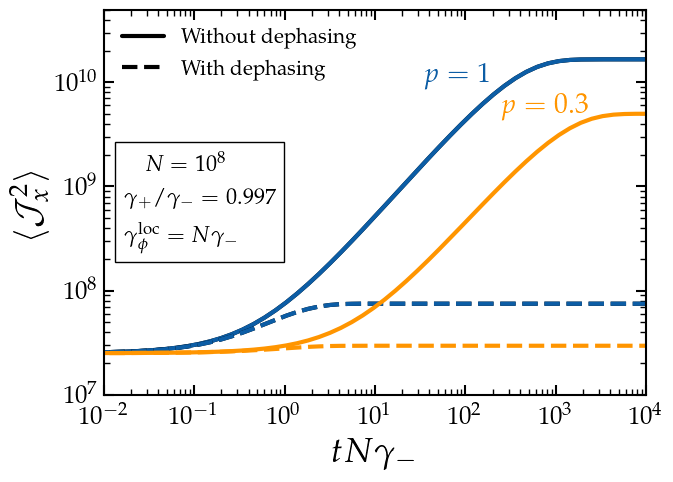

In [47]:
fig, ax = plt.subplots(figsize=(7,5))

N = 1e8

gpr = 0.997

norm = 1

pi = 1; de= 0
t2, j2, _, _ = on.solvex(N, gp_ratio=gpr, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax.loglog(t2, j2/norm, c='k', label=r'Without dephasing')
ax.loglog(t2, j2/norm, c='C0')#, label=r'$p=%.1f, ~\gamma^{\rm loc}_{\phi}=0$'%(pi))

pi = 1; de= 1
t2, j2, _, _ = on.solvex(N, gp_ratio=gpr, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax.loglog(t2, j2/norm, c='k', label=r'With dephasing', ls='--')
ax.loglog(t2, j2/norm, c='C0', ls = '--')#, label=r'$p=%.1f, ~\gamma^{\rm loc}_{\phi}=N\gamma_-$'%(pi))

pi = 0.3; de= 0
t2, j2, _, _ = on.solvex(N, gp_ratio=gpr, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax.loglog(t2, j2/norm, c='C2')#, label=r'$p=%.1f, ~\gamma^{\rm loc}_{\phi}=0$'%(pi))

pi = 0.3; de= 1
t2, j2, _, _ = on.solvex(N, gp_ratio=gpr, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax.loglog(t2, j2/norm, c='C2', ls='--')#, label=r'$p=%.1f, ~\gamma^{\rm loc}_{\phi}=N\gamma_-$'%(pi))

gamma = 0.997
text_box = AnchoredText(
    r"$N=10^8$\\~\\~~$\gamma_+/\gamma_-=0.997$~\\~\\~~$\gamma^{\rm loc}_\phi=N\gamma_-$",
    loc='center left',            
    frameon=True,                
    prop=dict(size=16)
)
ax.add_artist(text_box)

plt.text(35, 1e10, r'$p=1$', c='C0')
plt.text(250, 5e9,  r'$p=0.3$', c='C2')

ax.set_xlim(1e-2, 1e4)
ax.set_ylim(1e7,5e10)
ax.loglog(t2, t2/t2, c='k', ls='--', lw=1)
ax.set_xlabel(r'$tN\gamma_-$', fontsize=25)
ax.set_ylabel(r'$\langle {\cal J}_x^2\rangle$', fontsize=25)
ax.legend()
plt.show()
fig.savefig(main_dir+'plots/jx2_t.pdf', bbox_inches='tight')

## Using ${\tt OpenNu}$, look at different initial conditions

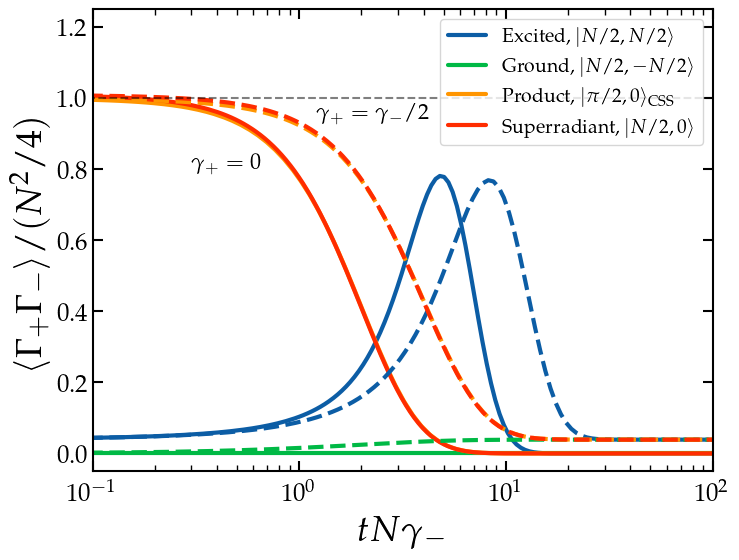

In [204]:
n = 100
path  = main_dir+f'../OpenNu/output/N%d'%n


# data contains (t, Jx, Jy, Jz, Jx^2, Jy^2, Jz^2, Jpm, Jmp, J)
dataP = np.loadtxt(path+f'/Product_RK4_h0.1_g0.00.txt')
dataE = np.loadtxt(path+f'/Excited_RK4_h0.1_g0.00.txt')
dataG = np.loadtxt(path+f'/Ground_RK4_h0.1_g0.00.txt')
dataD = np.loadtxt(path+f'/Dicke_RK4_h0.1_g0.00.txt')

dataP1 = np.loadtxt(path+f'/Product_RK4_h0.1_g0.50.txt')
dataE1 = np.loadtxt(path+f'/Excited_RK4_h0.1_g0.50.txt')
dataG1 = np.loadtxt(path+f'/Ground_RK4_h0.1_g0.50.txt')
dataD1 = np.loadtxt(path+f'/Dicke_RK4_h0.1_g0.50.txt')

Gmax = n*(n+1)/4

fig, ax = plt.subplots(1,1,figsize=(8,6))

plt.semilogx(dataE[:,0], dataE[:,7]/Gmax, label=r'Excited, $\vert N/2, N/2\rangle$')
plt.semilogx(dataG[:,0], dataG[:,7]/Gmax, label=r'Ground,  $\vert N/2, -N/2\rangle$')
plt.semilogx(dataP[:,0], dataP[:,7]/Gmax, label=r'Product, $\vert\pi/2, 0\rangle_{\rm CSS}$')
plt.semilogx(dataD[:,0], dataD[:,7]/Gmax, label=r'Superradiant, $\vert N/2, 0\rangle$')


plt.semilogx(dataE1[:,0], dataE1[:,7]/Gmax, c='C0', ls='--')
plt.semilogx(dataG1[:,0], dataG1[:,7]/Gmax, c='C1', ls='--')
plt.semilogx(dataP1[:,0], dataP1[:,7]/Gmax, c='C2', ls='--')
plt.semilogx(dataD1[:,0], dataD1[:,7]/Gmax, c='C3', ls='--')

plt.plot(dataE1[:,0], dataE1[:,0]/dataE1[:,0], ls='--', c='k', alpha=0.5, lw=1.5)

plt.xlim(1e-1, 100)
plt.ylim(-0.05, 1.25)

plt.text(1.2, 0.94, '$\gamma_+=\gamma_-/2$', fontsize=16)
plt.text(0.3, 0.8, '$\gamma_+=0$', fontsize=16)


plt.xlabel(r'$tN\gamma_-$', fontsize=26)
plt.ylabel(r'$\langle\Gamma_{+}\Gamma_-\rangle/(N^2/4)$', fontsize=26)
plt.legend(fontsize=14, frameon=True, loc=1)
plt.show()
fig.savefig(main_dir+'plots/num_1.pdf', bbox_inches='tight')

## 2nd order vs ${\tt qutip}$

In [75]:
# N = 50
# state = piqs.dicke(N,N/2,-N/2)
# gpr = 0.997

# nt = 1001
# td0 = 1/N # gamma_- = 1
# tmax = 100 * td0
# tq = np.geomspace(0.00001, tmax, nt)

# q_jx, q_jz, q_jx2, q_jz2, q_jpm, q_jmp, _ = run.RunQutip(N, tq, state, 0, 0, N, 1, gpr, 0)

In [ ]:
# N = 50
# t2_40, j2_40, _, _ = on.solvex(N, gp_ratio=gpr, gd_ratio=N, ntimes=1001, ti=0.0005)

In [ ]:
# interp_j2 = interp1d(t2_40, j2_40, kind='linear', bounds_error=False, fill_value='extrapolate')
# ct = tq*N
# j2_interp = interp_j2(ct)
# ratio_40 = (q_jx2_40 / N * 4) / (j2_interp / N * 4) 

In [146]:
#np.savetxt('ratio50.txt', np.column_stack([ct, ratio_40]))

In [102]:
r30 = np.loadtxt('ratio30.txt')
r40 = np.loadtxt('ratio40.txt')
r50 = np.loadtxt('ratio50.txt')

In [147]:
N3 = 30
t3, j3, _, _ = on.solvex(N3, gp_ratio=gpr, gd_ratio=N3, ntimes=1001, ti=0.0003)

N4 = 40
t4, j4, _, _ = on.solvex(N4, gp_ratio=gpr, gd_ratio=N4, ntimes=1001, ti=0.0004)

N5 = 50
t5, j5, _, _ = on.solvex(N5, gp_ratio=gpr, gd_ratio=N5, ntimes=1001, ti=0.0005)

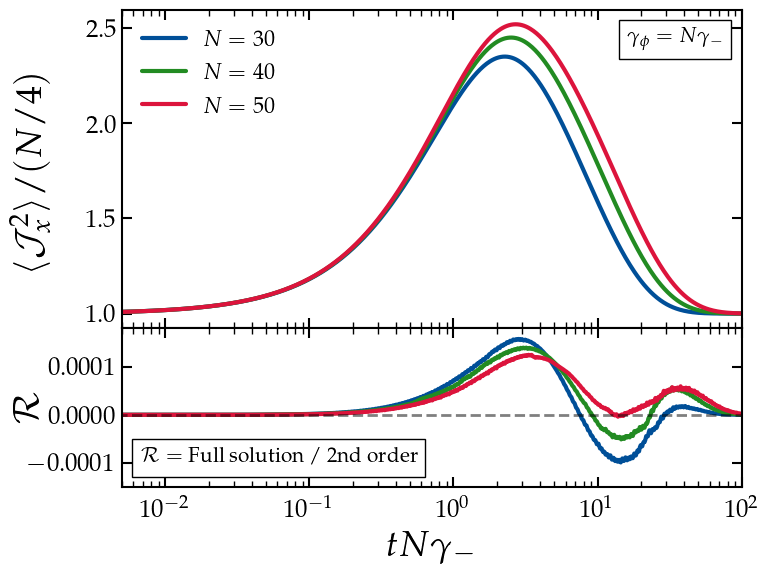

In [201]:
fig = plt.figure(figsize=(8,6.2))

gs = gridspec.GridSpec(2, 1, height_ratios=[1,0.5],  hspace=0.)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

ax0.semilogx(t3, j3/(N3/4), label=r'$N=30$', c='#004f98')
ax0.semilogx(t4, j4/(N4/4), label=r'$N=40$', c='forestgreen')
ax0.semilogx(t5, j5/(N5/4), label=r'$N=50$', c='crimson')
ax0.set_ylabel(r'$\langle{\cal J}^2_x\rangle/(N/4)$', fontsize=26, labelpad=25)
ax0.set_xlim(5e-3, 1e2)
ax0.legend(fontsize=16)
ax0.set_xticklabels([])

text_box = AnchoredText(
    r"$\gamma_\phi=N\gamma_-$",
    loc='upper right',            
    frameon=True,                
    prop=dict(size=15)
)
ax0.add_artist(text_box)


ax1.semilogx(r30[:,0], sn.gaussian_filter(r30[:,1], sigma=1)-1, label=r'$N=30$', c='#004f98')
ax1.semilogx(r40[:,0], sn.gaussian_filter(r40[:,1], sigma=1)-1, label=r'$N=40$', c='forestgreen')
ax1.semilogx(r50[:,0], sn.gaussian_filter(r50[:,1], sigma=1)-1, label=r'$N=50$', c='crimson')
ax1.semilogx(r40[:,0], r40[:,0]/r40[:,0]-1, ls='--', c='k', lw=2, alpha=0.5)

ax1.set_xlabel(r'$tN\gamma_-$', fontsize=26)
ax1.set_ylabel(r'${\cal R}$', fontsize=26, labelpad=-15)
ax1.set_xlim(5e-3, 1e2)
ax1.set_ylim(-0.00015, 0.00018)
#ax1.set_ylim(0.9998, 1.0002)

text_box = AnchoredText(
    r"${\cal R}=$ Full solution / 2nd order",
    loc='lower left',            
    frameon=True,                
    prop=dict(size=15)
)
ax1.add_artist(text_box)
plt.show()
fig.savefig(main_dir+'plots/qutip_comparison.pdf', bbox_inches='tight')

## Parameter space

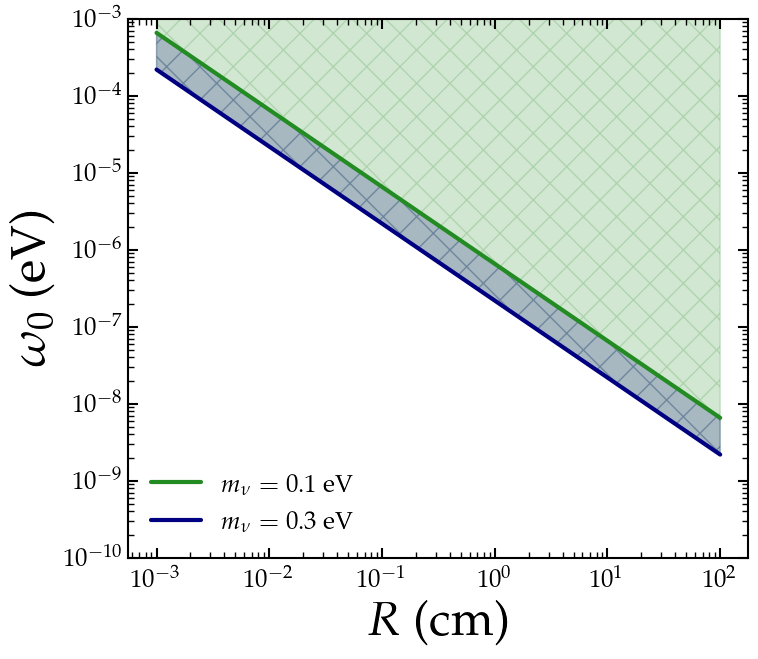

In [13]:
ww = np.geomspace(1e-10, 1e-5,100)
rr = np.geomspace(0.001, 100,100)

m1 = 0.1
m2 = 0.3
knu = 5.3e-4

c1 = 'forestgreen'
c2 = 'navy'

plt.loglog(rr,knu/m1/rr/8065, color=c1, label=r'$m_\nu=0.1$ eV')
plt.fill_between(rr, knu/m2/rr/8065,  1, alpha=0.2, hatch='X', color=c1)
plt.loglog(rr,knu/m2/rr/8065, color=c2, label=r'$m_\nu=0.3$ eV')
plt.fill_between(rr, knu/m2/rr/8065, knu/m1/rr/8065, alpha=0.2, hatch='X', color=c2)

plt.xlabel(r'$R$ (cm)')
plt.ylabel(r'$\omega_0$ (eV)')
plt.ylim(1e-10, 1e-3)
plt.legend(loc=3, fontsize=18)
plt.show()